In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from scipy.interpolate import interp1d
import matplotlib.cm as cm
from salishsea_tools import (nc_tools, gsw_calls, geo_tools, viz_tools)
import seabird
import cmocean as cmo
from datetime import (
    datetime,
    timedelta,
)
from matplotlib.dates import date2num, DateFormatter

import pandas as pd

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

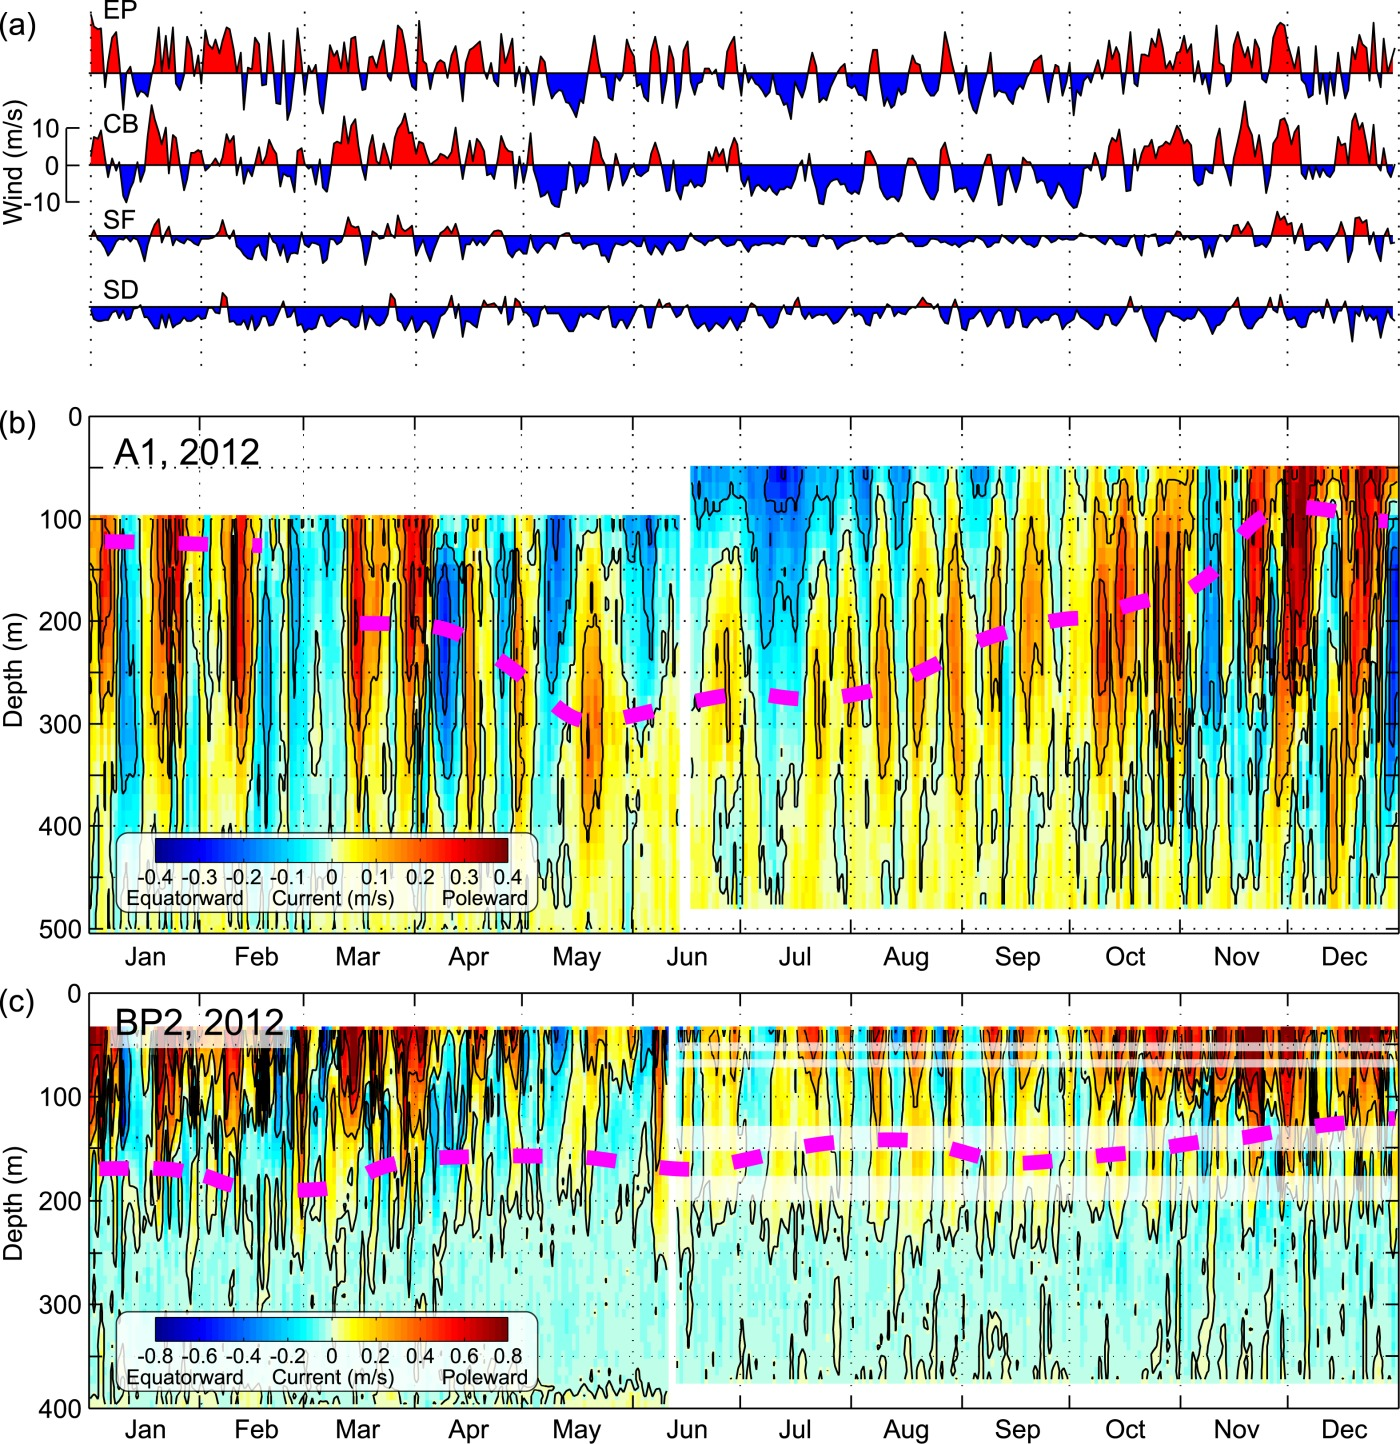

In [9]:
from IPython.display import Image


Image("/home/ssahu/saurav/3D_images_for_video_spice/Thomson_2015.jpg")

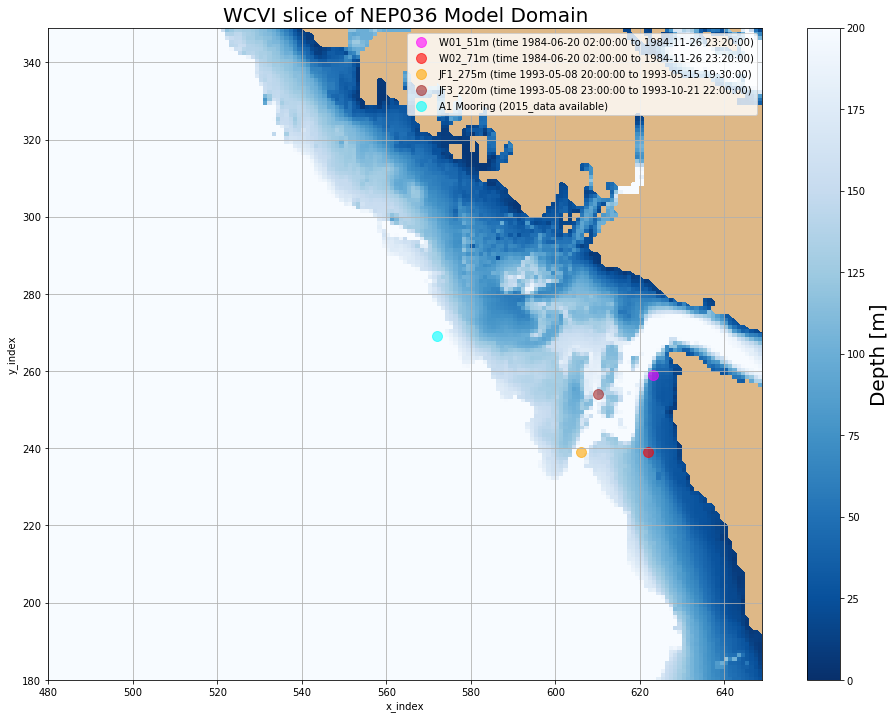

In [2]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')


Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(180,350)
x_wcvi_slice = np.arange(480,650)



lon_model = bathy['nav_lon'][...]
lat_model = bathy['nav_lat'][...]


cmap = plt.get_cmap('Blues_r')

cmap.set_bad('burlywood')
fig, ax = plt.subplots(1, 1, figsize=(16,12)); ax.grid()
p = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0, vmax=200)




lon_W01 = -124.82500
lat_W01 = 48.31500

j, i = geo_tools.find_closest_model_point(lon_W01,lat_W01,\
                                          lon_model,lat_model,grid='NEMO',tols=\
                                          {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                           'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})      
ax.scatter(i, j, c='magenta', s=100, alpha=0.6, label = 'W01_51m (time 1984-06-20 02:00:00 to 1984-11-26 23:20:00)')

lon_W02 = -124.89500
lat_W02 = 48.04167

y, x = geo_tools.find_closest_model_point(lon_W02,lat_W02,\
                                          lon_model,lat_model,grid='NEMO',tols=\
                                          {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                           'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
ax.scatter(x, y, c='red', s=100, alpha=0.6, label = 'W02_71m (time 1984-06-20 02:00:00 to 1984-11-26 23:20:00)')

lon_JF1 = -125.31383
lat_JF1 = 48.05433

y, x = geo_tools.find_closest_model_point(lon_JF1,lat_JF1,\
                                          lon_model,lat_model,grid='NEMO',tols=\
                                          {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                           'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
ax.scatter(x, y, c='orange', s=100, alpha=0.6, label = 'JF1_275m (time 1993-05-08 20:00:00 to 1993-05-15 19:30:00)')

lon_JF3 = -125.20267
lat_JF3 = 48.25867

y, x = geo_tools.find_closest_model_point(lon_JF3,lat_JF3,\
                                          lon_model,lat_model,grid='NEMO',tols=\
                                          {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                           'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
ax.scatter(x, y, c='brown', s=100, alpha=0.6, label = 'JF3_220m (time 1993-05-08 23:00:00 to 1993-10-21 22:00:00)')


lon_A1 = -126.20433
lat_A1 = 48.52958

j, i = geo_tools.find_closest_model_point(lon_A1,lat_A1,\
                                          lon_model,lat_model,grid='NEMO',tols=\
                                          {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                           'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}}) 
ax.scatter(i, j, c='cyan', s=100, alpha=0.6, label = 'A1 Mooring (2015_data available)')

legend = ax.legend(loc='best', fancybox=True, framealpha=0.8)
ax.set_xlabel('x_index')
ax.set_ylabel('y_index')
ax.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)
viz_tools.plot_land_mask(ax, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax)
cbar.ax.set_ylabel('Depth [m]', fontsize=20)
ax.grid()


In [58]:
W02_data_30m = pd.read_table('/data/ssahu/IOS_data/curr_meter/W02_19840619_19841126_0030m.csv',delim_whitespace=1,header = None, skiprows=117)

W02_data_30m.columns = ['Salinity', 'Temperature', 'Direction', 'Speed']

W02_data_30m.tail(10)

Salinity  Temperature  Direction  Speed
11503    31.920       11.438      270.0  0.198
11504    31.863       11.414      264.0  0.191
11505    31.825       11.414      267.0  0.196
11506    31.845       11.414      273.0  0.207
11507    31.900       11.461      281.0  0.212
11508    31.939       11.461      290.0  0.209
11509    32.031       11.554      307.0  0.188
11510    31.742       11.601      331.0  0.186
11511    32.144       11.624      346.0  0.186
11512    32.144       11.624      357.0  0.172

In [59]:
W02_data_50m = pd.read_table('/data/ssahu/IOS_data/curr_meter/W02_19840619_19841126_0050m.csv',delim_whitespace=1,header = None, skiprows=117)

W02_data_50m.columns = ['Salinity', 'Temperature', 'Direction', 'Speed']

W02_data_50m.tail(10)

Salinity  Temperature  Direction  Speed
11503    32.385       11.646      326.0  0.131
11504    32.385       11.646      332.0  0.145
11505    32.361       11.622      331.0  0.146
11506    32.098       11.622      329.0  0.135
11507    32.164       11.622      327.0  0.125
11508    32.340       11.622      331.0  0.119
11509    32.385       11.646      338.0  0.114
11510    32.385       11.646      342.0  0.110
11511    32.384       11.622      341.0  0.104
11512    32.385       11.646      329.0  0.095

In [60]:
W02_data_65m = pd.read_table('/data/ssahu/IOS_data/curr_meter/W02_19840619_19841126_0065m.csv',delim_whitespace=1,header = None, skiprows=117)

W02_data_65m.columns = ['Reference', 'Temperature', 'Direction', 'Speed']

W02_data_65m.tail(10)

Reference  Temperature  Direction  Speed
11498      401.0       11.554      321.0  0.115
11499      401.0       11.600      323.0  0.104
11500      401.0       11.600      324.0  0.065
11501      401.0       11.600      325.0  0.019
11502      401.0       11.600      322.0  0.009
11503      401.0       11.600      323.0  0.019
11504      401.0       11.600      323.0  0.020
11505      401.0       11.577      323.0  0.020
11506      401.0       11.600      317.0  0.021
11507      401.0       11.507      302.0  0.036

In [61]:
Speed_30 = np.array(W02_data_30m['Speed'], dtype = np.float)[:]
Direct_30 = np.array(W02_data_30m['Direction'], dtype = np.float)[:]

vel_east_30 = np.empty_like(Speed_30)
vel_north_30 = np.empty_like(Speed_30)

vel_east_30[:] = Speed_30[:]*np.cos(np.radians(Direct_30[:]))
vel_north_30[:] = Speed_30[:]*np.sin(np.radians(Direct_30[:]))


Speed_50 = np.array(W02_data_50m['Speed'], dtype = np.float)[:]
Direct_50 = np.array(W02_data_50m['Direction'], dtype = np.float)[:]

vel_east_50 = np.empty_like(Speed_50)
vel_north_50 = np.empty_like(Speed_50)

vel_east_50[:] = Speed_50[:]*np.cos(np.radians(Direct_50[:]))
vel_north_50[:] = Speed_50[:]*np.sin(np.radians(Direct_50[:]))


Speed_65 = np.array(W02_data_65m['Speed'], dtype = np.float)[:]
Direct_65 = np.array(W02_data_65m['Direction'], dtype = np.float)[:]

vel_east_65 = np.empty_like(Speed_65)
vel_north_65 = np.empty_like(Speed_65)

vel_east_65[:] = Speed_65[:]*np.cos(np.radians(Direct_65[:]))
vel_north_65[:] = Speed_65[:]*np.sin(np.radians(Direct_65[:]))

vel_east_65[vel_north_65 > 1] = 0
vel_north_65[vel_north_65 > 1] = 0

In [63]:
np.mean(Speed_50)

0.20496299834969164

In [33]:
date1 = '1984-06-20-02:00:00'
date2 = '1984-11-26-23:20:00'


mydates = pd.date_range(date1, date2, freq="20min")

# mydates = np.ndarray.round(mydates[:], decimals=0)

In [9]:
mydates.shape

(11513,)

In [16]:
np.max(Speed_65)

0.68400000000000005

In [18]:
import seaborn as sns

sns.set_context('poster')

In [7]:
path_to_save = '/home/ssahu/saurav/NEP36_Model_Eval_plots/'

In [27]:
import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=0,vmax=0.4)


cm = plt.get_cmap(cmo.cm.matter)


sm = mpl.cm.ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])


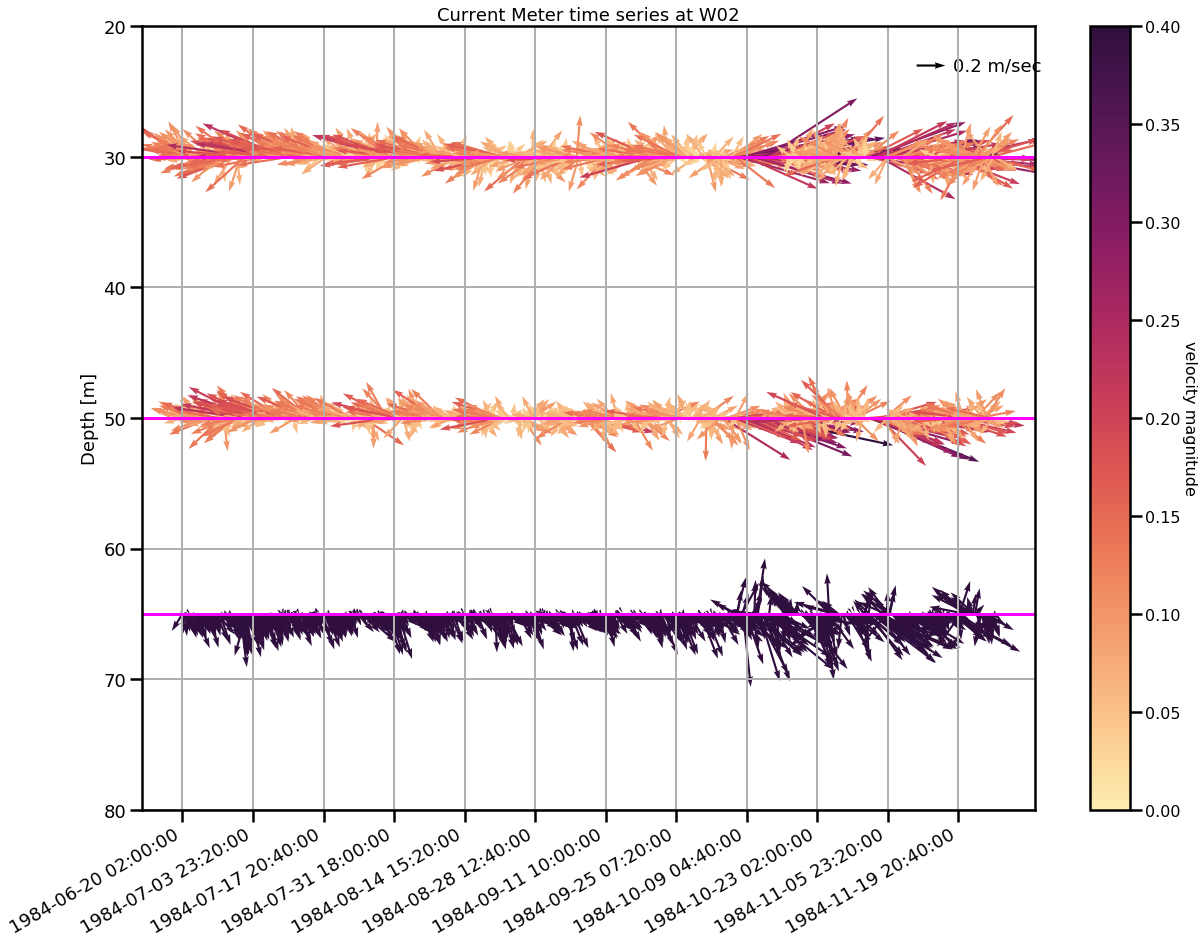

In [34]:
step = 10

time_axis_quiver = np.arange(0,vel_east_30.shape[0],step)

time_axis_quiver_65 = np.arange(0, vel_east_65.shape[0], step)

my_dates = mydates[::step]


fig, ax = plt.subplots(1, 1, figsize=(20,16))

ax.quiver(time_axis_quiver, 30, vel_east_30[::step], vel_north_30[::step], Speed_30[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5, cmap = cm)# , minshaft = 3)
ax.axhline(y=30, color='magenta', label = '30 m')

Q = ax.quiver(time_axis_quiver, 50, vel_east_50[::step], vel_north_50[::step], Speed_50[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5, cmap = cm)# , minshaft = 3)
ax.axhline(y=50, color='magenta', label = '50 m')

ax.quiver(time_axis_quiver_65, 65, vel_east_65[::step], vel_north_65[::step], Speed_65[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale = 0.5, cmap = cm)# , minshaft = 3)
ax.axhline(y=65, color='magenta', label = '65 m')

ax.set_ylabel('Depth [m]', fontsize =18)
plt.xticks(time_axis_quiver[::100], my_dates[::100])
ax.format_xdata = DateFormatter('%Y-%m-%d-%h-%m')
fig.autofmt_xdate()
ax.set_ylim(20, 80)
ax.invert_yaxis()
ax.set_title('Current Meter time series at W02', fontsize = 18)
ax.quiverkey(Q, 0.9, 0.95, 0.2, r'0.2 m/sec', labelpos='E', fontproperties={'size': 18})
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 
ax.tick_params(axis='both',labelsize =18)

cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=16) 
cbar.set_label('velocity magnitude', rotation=270, fontsize = 16, labelpad =16)
# plt.savefig(path_to_save+'W02_current_meter_high_res.png')

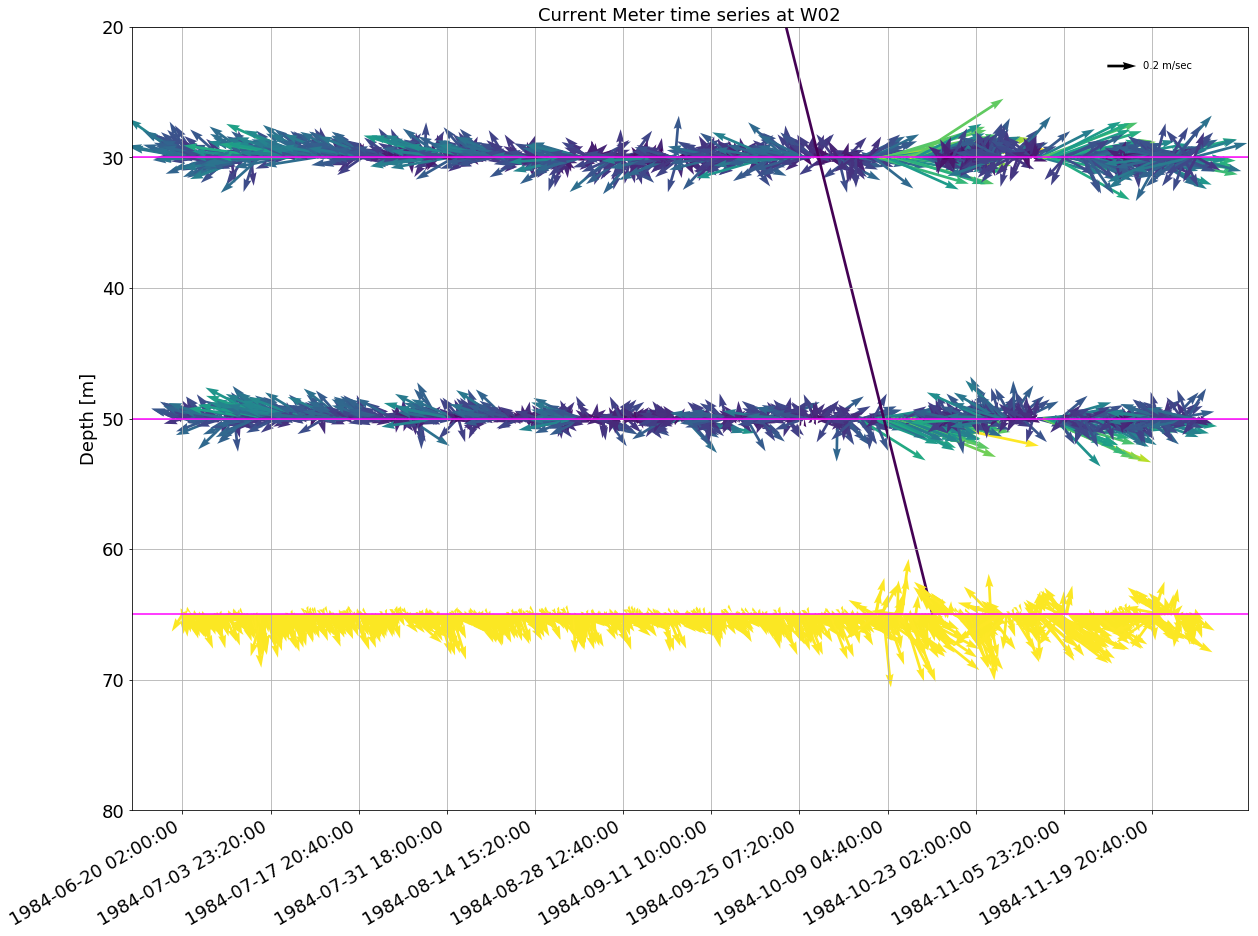

In [10]:
step = 10

time_axis_quiver = np.arange(0,vel_east_30.shape[0],step)

time_axis_quiver_65 = np.arange(0, vel_east_65.shape[0], step)

my_dates = mydates[::step]


fig, ax = plt.subplots(1, 1, figsize=(20,16))

ax.quiver(time_axis_quiver, 30, vel_east_30[::step], vel_north_30[::step], Speed_30[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
ax.axhline(y=30, color='magenta', label = '30 m')

Q = ax.quiver(time_axis_quiver, 50, vel_east_50[::step], vel_north_50[::step], Speed_50[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
ax.axhline(y=50, color='magenta', label = '50 m')

ax.quiver(time_axis_quiver_65, 65, vel_east_65[::step], vel_north_65[::step], Speed_65[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale = 0.5)# , minshaft = 3)
ax.axhline(y=65, color='magenta', label = '65 m')

ax.set_ylabel('Depth [m]', fontsize =18)
plt.xticks(time_axis_quiver[::100], my_dates[::100])
ax.format_xdata = DateFormatter('%Y-%m-%d-%h-%m')
fig.autofmt_xdate()
ax.set_ylim(20, 80)
ax.invert_yaxis()
ax.set_title('Current Meter time series at W02', fontsize = 18)
ax.quiverkey(Q, 0.9, 0.95, 0.2, r'0.2 m/sec', labelpos='E')
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 
ax.tick_params(axis='both',labelsize =18)
plt.savefig(path_to_save+'W02_current_meter_high_res.png')

In [43]:
vel_east_65.shape

(11508,)

In [35]:
W02_series = pd.Series(vel_east_30, index=mydates)
daily_east = W02_series.resample('1440T').sum()
vel_30_daily_east = daily_east.values
east_30 = np.divide(vel_30_daily_east[:], 24)

W02_series_north = pd.Series(vel_north_30, index=mydates)
daily_north = W02_series_north.resample('1440T').sum()
vel_30_daily_north = daily_north.values
north_30 = np.divide(vel_30_daily_north[:], 24)


Speed_30 = np.sqrt(east_30**2 + north_30**2)

W02_series = pd.Series(vel_east_50, index=mydates)
daily_east = W02_series.resample('1440T').sum()
vel_50_daily_east = daily_east.values
east_50 = np.divide(vel_50_daily_east[:], 24)

W02_series_north = pd.Series(vel_north_50, index=mydates)
daily_north = W02_series_north.resample('1440T').sum()
vel_50_daily_north = daily_north.values
north_50 = np.divide(vel_50_daily_north[:], 24)


Speed_50 = np.sqrt(east_50**2 + north_50**2)

W02_series = pd.Series(vel_east_65, index=mydates[:-5])
daily_east = W02_series.resample('1440T').sum()
vel_65_daily_east = daily_east.values
east_65 = np.divide(vel_65_daily_east[:], 24)

W02_series_north = pd.Series(vel_north_65, index=mydates[:-5])
daily_north = W02_series_north.resample('1440T').sum()
vel_65_daily_north = daily_north.values
north_65 = np.divide(vel_65_daily_north[:], 24)


Speed_65 = np.sqrt(east_65**2 + north_65**2)

In [36]:
date1 = '1984-06-20-02:00:00'
date2 = '1984-11-26-23:20:00'


mydates = pd.date_range(date1, date2, freq="D")

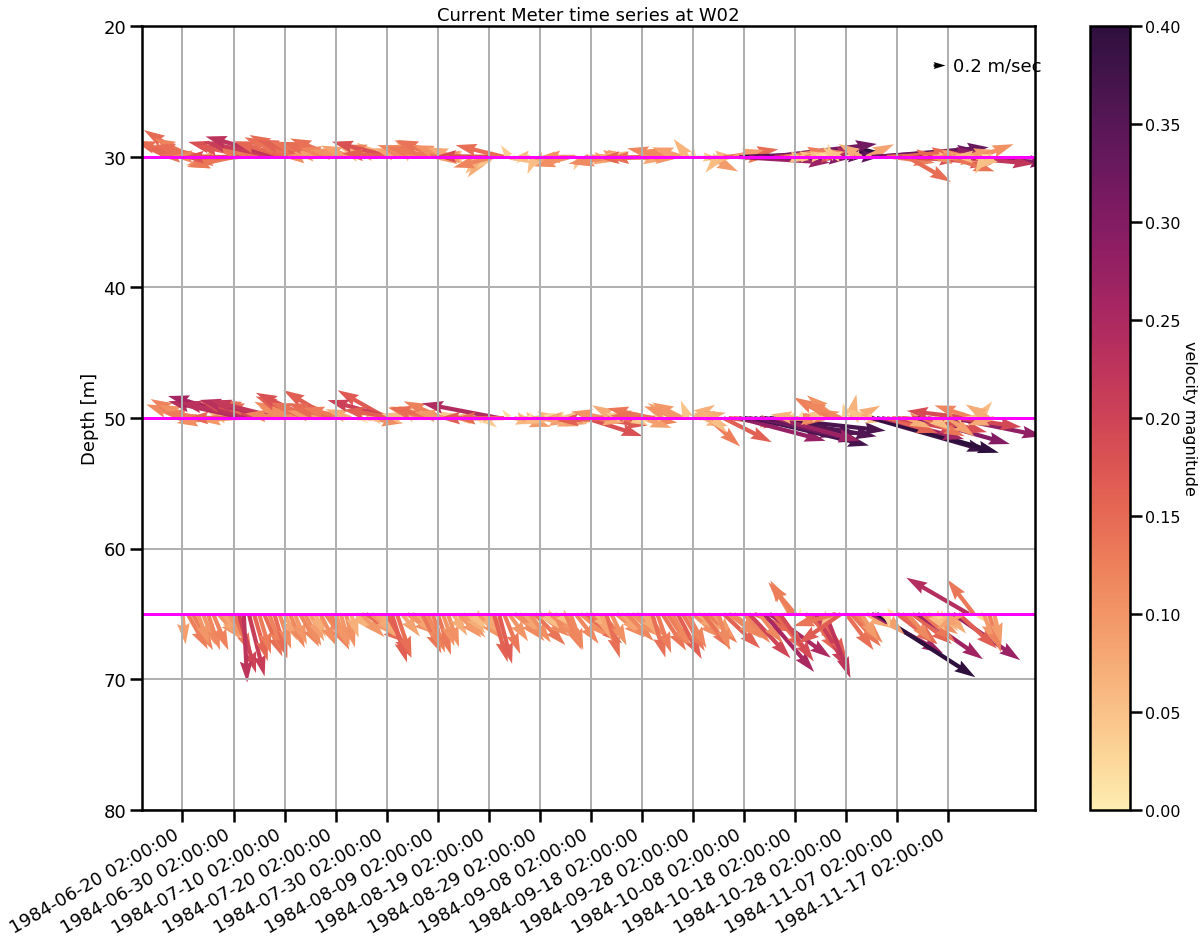

In [38]:
step = 1

# time_axis_quiver = np.arange(0,vel_east_30.shape[0],step)

time_axis_quiver_30 = np.arange(0, east_30.shape[0])
time_axis_quiver_50 = np.arange(0, east_50.shape[0])
time_axis_quiver_65 = np.arange(0, east_65.shape[0])

date1 = '1984-06-20-02:00:00'
date2 = '1984-11-26-23:20:00'
mydates = pd.date_range(date1, date2, freq="1440min")


fig, ax = plt.subplots(1, 1, figsize=(20,16))

# ax.quiver(time_axis_quiver, 30, vel_east_30[::step], vel_north_30[::step], Speed_30[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
# ax.axhline(y=30, color='magenta', label = '30 m')

Q = ax.quiver(time_axis_quiver_30, 30, east_30[:], north_30[:], Speed_30[:], angles='uv', scale_units='inches', cmap = cm)#, minshaft= 0.01, scale=0.3)# , minshaft = 3)
ax.axhline(y=30, color='magenta', label = '30 m')

ax.quiver(time_axis_quiver_50, 50, east_50[:], north_50[:], Speed_50[:], angles='uv', scale_units='inches', cmap = cm)#, minshaft= 0.01, scale=0.3)# , minshaft = 3)
ax.axhline(y=50, color='magenta', label = '50 m')

ax.quiver(time_axis_quiver_65, 65, east_65[:], north_65[:], Speed_65[:], angles='uv', scale_units='inches', cmap = cm)#, minshaft= 0.01, scale=0.3)# , minshaft = 3)
ax.axhline(y=65, color='magenta', label = '65 m')

ax.set_ylabel('Depth [m]', fontsize =18)
plt.xticks(time_axis_quiver_30[::10], mydates[::10])
ax.format_xdata = DateFormatter('%Y-%m-%d-%h-%m')
fig.autofmt_xdate()
ax.set_ylim(20,80)
ax.invert_yaxis()
ax.set_title('Current Meter time series at W02', fontsize = 18)
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 
ax.quiverkey(Q, 0.9, 0.95, 0.2, r'0.2 m/sec', labelpos='E', fontproperties={'size': 18})
ax.tick_params(axis='both',labelsize =18)

cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=16) 
cbar.set_label('velocity magnitude', rotation=270, fontsize = 16, labelpad =16)
# plt.savefig(path_to_save+'W02_daily.png')

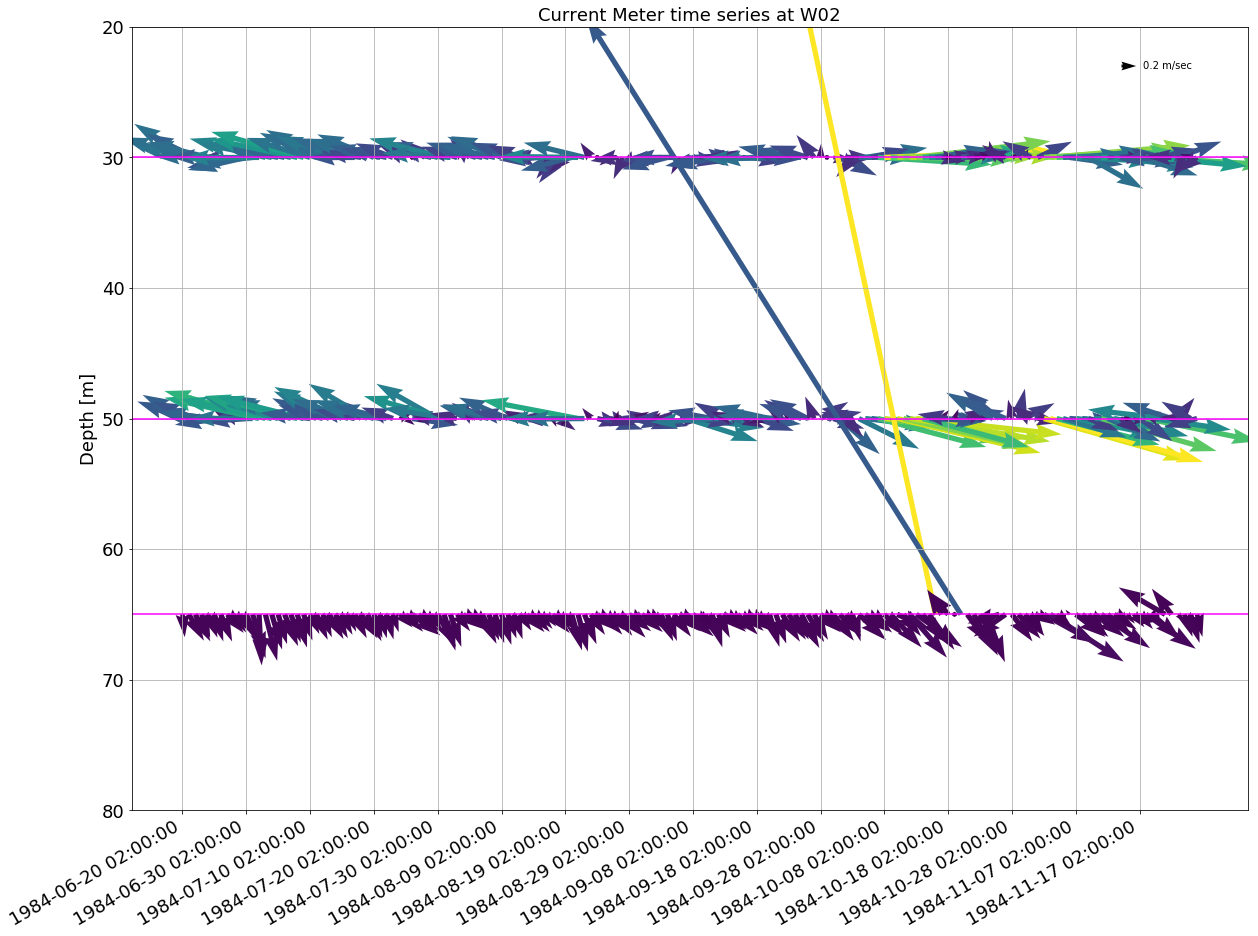

In [14]:
step = 1

# time_axis_quiver = np.arange(0,vel_east_30.shape[0],step)

time_axis_quiver_30 = np.arange(0, east_30.shape[0])
time_axis_quiver_50 = np.arange(0, east_50.shape[0])
time_axis_quiver_65 = np.arange(0, east_65.shape[0])

date1 = '1984-06-20-02:00:00'
date2 = '1984-11-26-23:20:00'
mydates = pd.date_range(date1, date2, freq="1440min")


fig, ax = plt.subplots(1, 1, figsize=(20,16))

# ax.quiver(time_axis_quiver, 30, vel_east_30[::step], vel_north_30[::step], Speed_30[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
# ax.axhline(y=30, color='magenta', label = '30 m')

Q = ax.quiver(time_axis_quiver_30, 30, east_30[:], north_30[:], Speed_30[:], angles='uv', scale_units='inches')#, minshaft= 0.01, scale=0.3)# , minshaft = 3)
ax.axhline(y=30, color='magenta', label = '30 m')

ax.quiver(time_axis_quiver_50, 50, east_50[:], north_50[:], Speed_50[:], angles='uv', scale_units='inches')#, minshaft= 0.01, scale=0.3)# , minshaft = 3)
ax.axhline(y=50, color='magenta', label = '50 m')

ax.quiver(time_axis_quiver_65, 65, east_65[:], north_65[:], Speed_65[:], angles='uv', scale_units='inches')#, minshaft= 0.01, scale=0.3)# , minshaft = 3)
ax.axhline(y=65, color='magenta', label = '65 m')

ax.set_ylabel('Depth [m]', fontsize =18)
plt.xticks(time_axis_quiver_30[::10], mydates[::10])
ax.format_xdata = DateFormatter('%Y-%m-%d-%h-%m')
fig.autofmt_xdate()
ax.set_ylim(20,80)
ax.invert_yaxis()
ax.set_title('Current Meter time series at W02', fontsize = 18)
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 
ax.quiverkey(Q, 0.9, 0.95, 0.2, r'0.2 m/sec', labelpos='E')
ax.tick_params(axis='both',labelsize =18)
plt.savefig(path_to_save+'W02_daily.png')

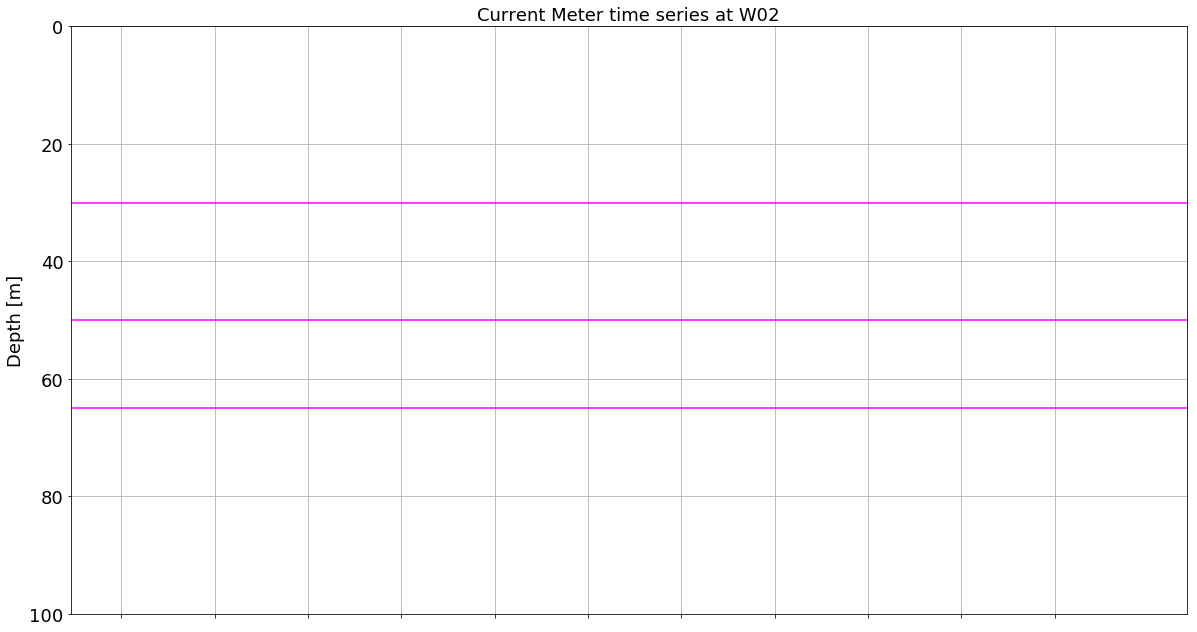

In [15]:
# mydates[3050:7400]

step = 1

time_axis_quiver = np.arange(0,vel_east_30[3050:7400].shape[0],step)

time_axis_quiver_65 = np.arange(0, vel_east_65[3050:7400].shape[0], step)

my_dates = mydates[3050:7400:step]


fig, ax = plt.subplots(1, 1, figsize=(20,12))

ax.quiver(time_axis_quiver, 30, vel_east_30[3050:7400:step], vel_north_30[3050:7400:step], Speed_30[3050:7400:step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
ax.axhline(y=30, color='magenta', label = '30 m')

ax.quiver(time_axis_quiver, 50, vel_east_50[3050:7400:step], vel_north_50[3050:7400:step], Speed_50[3050:7400:step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
ax.axhline(y=50, color='magenta', label = '50 m')

ax.quiver(time_axis_quiver_65, 65, vel_east_65[3050:7400:step], vel_north_65[3050:7400:step], Speed_65[3050:7400:step], angles='uv', scale_units='inches', minshaft= 0.01, scale = 0.5)# , minshaft = 3)
ax.axhline(y=65, color='magenta', label = '65 m')

ax.set_ylabel('Depth [m]', fontsize =18)
plt.xticks(time_axis_quiver[::400], my_dates[::400])
ax.format_xdata = DateFormatter('%Y-%m-%d-%h-%m')
fig.autofmt_xdate()
ax.set_ylim(0, 100)
ax.invert_yaxis()
ax.set_title('Current Meter time series at W02', fontsize = 18)
ax.tick_params(axis='both',labelsize =18)
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 

In [39]:
W01_data_30m = pd.read_table('/data/ssahu/IOS_data/curr_meter/W01_19840619_19841102_0030m.csv',delim_whitespace=1,header = None, skiprows=116)

W01_data_30m.columns = ['Reference', 'Temperature', 'Direction', 'Speed']

W01_data_30m.tail(10)

Reference  Temperature  Direction  Speed
9757      273.0       11.042      -99.0  0.567
9758      273.0       11.019      -99.0  0.673
9759      273.0       11.065      -99.0  0.791
9760      273.0       11.065      -99.0  0.841
9761      273.0       11.042      -99.0  0.858
9762      273.0       10.996      -99.0  0.863
9763      273.0       10.972      -99.0  0.861
9764      273.0       10.949      -99.0  0.883
9765      273.0       10.926      -99.0  0.872
9766      273.0       10.949      -99.0  0.891

In [40]:
W01_data_45m = pd.read_table('/data/ssahu/IOS_data/curr_meter/W01_19840619_19841102_0045m.csv',delim_whitespace=1,header = None, skiprows=113)

W01_data_45m.columns = ['Reference', 'Temperature', 'Direction', 'Speed']

W01_data_45m.tail(10)

Reference  Temperature  Direction  Speed
9760      550.0       10.684        5.0  0.631
9761      551.0       10.893        6.0  0.711
9762      550.0       10.823        6.0  0.739
9763      550.0       10.846        7.0  0.779
9764      551.0       10.823        6.0  0.820
9765      550.0       10.869       10.0  0.826
9766      551.0       10.869       14.0  0.800
9767      550.0       10.846       13.0  0.767
9768      551.0       10.869        9.0  0.728
9769      551.0       10.869        7.0  0.716

In [41]:
Speed_30 = np.array(W01_data_30m['Speed'], dtype = np.float)[:]
Direct_30 = np.array(W01_data_30m['Direction'], dtype = np.float)[:]

vel_east_30 = np.empty_like(Speed_30)
vel_north_30 = np.empty_like(Speed_30)

vel_east_30[:] = Speed_30[:]*np.cos(np.radians(Direct_30[:]))
vel_north_30[:] = Speed_30[:]*np.sin(np.radians(Direct_30[:]))


Speed_45 = np.array(W01_data_45m['Speed'], dtype = np.float)[:]
Direct_45 = np.array(W01_data_45m['Direction'], dtype = np.float)[:]

vel_east_45 = np.empty_like(Speed_45)
vel_north_45 = np.empty_like(Speed_45)

vel_east_45[:] = Speed_45[:]*np.cos(np.radians(Direct_45[:]))
vel_north_45[:] = Speed_45[:]*np.sin(np.radians(Direct_45[:]))




In [42]:
date1 = '1984-06-19-16:00:00'
date2 = '1984-11-02-08:20:00'


mydates = pd.date_range(date1, date2, freq="20min")

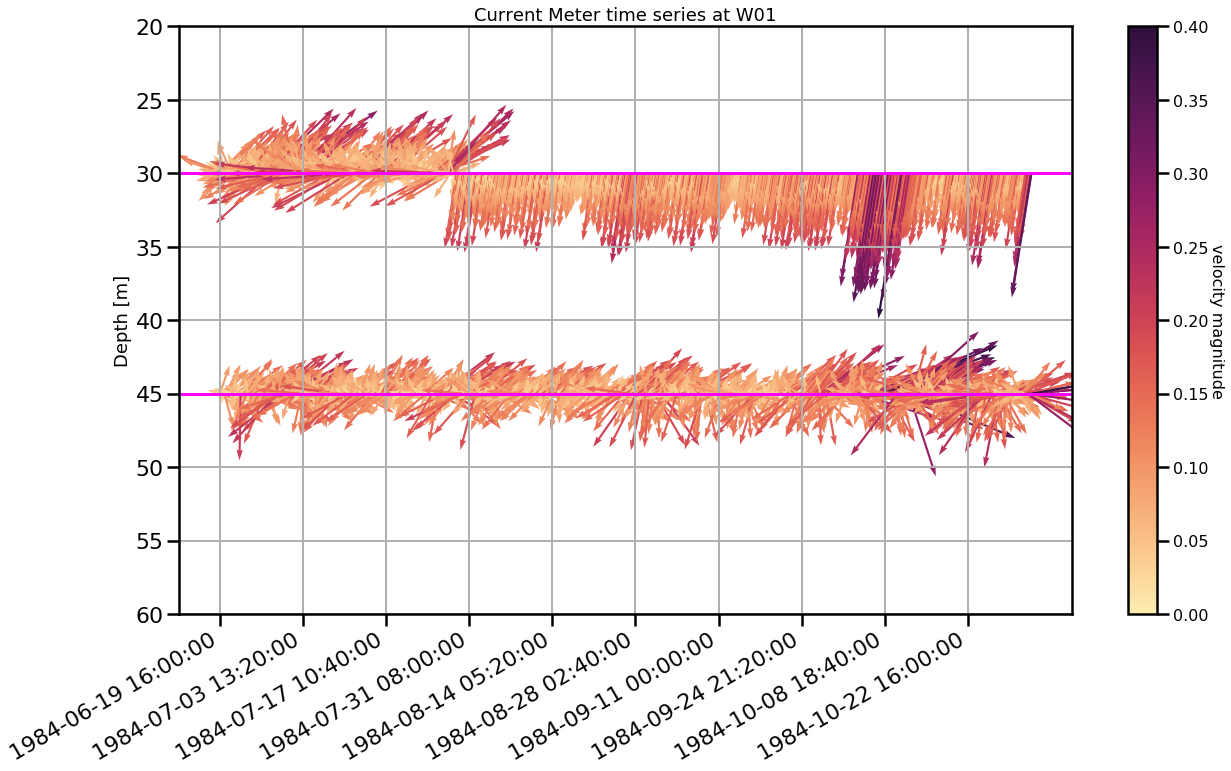

In [44]:
step = 5

time_axis_quiver = np.arange(0,vel_east_30.shape[0],step)

time_axis_quiver_65 = np.arange(0, vel_east_45.shape[0], step)

my_dates = mydates[::step]


fig, ax = plt.subplots(1, 1, figsize=(20,12))

ax.quiver(time_axis_quiver, 30, vel_east_30[::step], vel_north_30[::step], Speed_30[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5, cmap = cm)# , minshaft = 3)
ax.axhline(y=30, color='magenta', label = '30 m')

ax.quiver(time_axis_quiver, 45, vel_east_45[::step], vel_north_45[::step], Speed_45[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5, cmap = cm)# , minshaft = 3)
ax.axhline(y=45, color='magenta', label = '45 m')


ax.set_ylabel('Depth [m]', fontsize =18)
plt.xticks(time_axis_quiver[::200], my_dates[::200])
ax.format_xdata = DateFormatter('%Y-%m-%d-%h-%m')
fig.autofmt_xdate()
ax.set_ylim(20, 60)
ax.invert_yaxis()
ax.set_title('Current Meter time series at W01', fontsize = 18)
ax.quiverkey(Q, 0.9, 0.95, 0.2, r'0.2 m/sec', labelpos='E', fontproperties={'size': 18})

cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=16) 
cbar.set_label('velocity magnitude', rotation=270, fontsize = 16, labelpad =16)

# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 

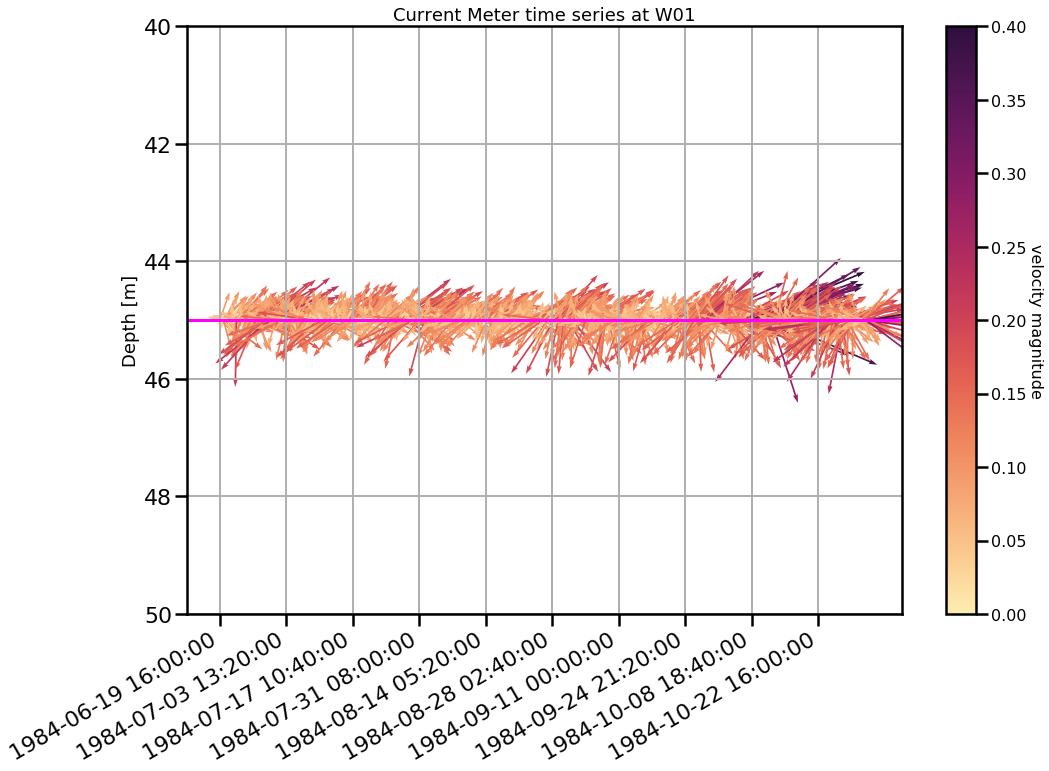

In [47]:
step = 5

time_axis_quiver = np.arange(0,vel_east_30.shape[0],step)

time_axis_quiver_65 = np.arange(0, vel_east_45.shape[0], step)

my_dates = mydates[::step]


fig, ax = plt.subplots(1, 1, figsize=(16,12))

# ax.quiver(time_axis_quiver, 30, vel_east_30[::step], vel_north_30[::step], Speed_30[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5, cmap = cm)# , minshaft = 3)
# ax.axhline(y=30, color='magenta', label = '30 m')

ax.quiver(time_axis_quiver, 45, vel_east_45[::step], vel_north_45[::step], Speed_45[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5, cmap = cm)# , minshaft = 3)
ax.axhline(y=45, color='magenta', label = '45 m')


ax.set_ylabel('Depth [m]', fontsize =18)
plt.xticks(time_axis_quiver[::200], my_dates[::200])
ax.format_xdata = DateFormatter('%Y-%m-%d-%h-%m')
fig.autofmt_xdate()
ax.set_ylim(40, 50)
ax.invert_yaxis()
ax.set_title('Current Meter time series at W01', fontsize = 18)
ax.quiverkey(Q, 0.9, 0.95, 0.2, r'0.2 m/sec', labelpos='E', fontproperties={'size': 18})

cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=16) 
cbar.set_label('velocity magnitude', rotation=270, fontsize = 16, labelpad =16)

# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 

In [48]:
W01_series = pd.Series(vel_east_45, index=mydates)
daily_east = W01_series.resample('1440T').sum()
vel_45_daily_east = daily_east.values
east_45 = np.divide(vel_45_daily_east[:], 24)

W01_series_north = pd.Series(vel_north_45, index=mydates)
daily_north = W01_series_north.resample('1440T').sum()
vel_45_daily_north = daily_north.values
north_45 = np.divide(vel_45_daily_north[:], 24)


Speed_45 = np.sqrt(east_45**2 + north_45**2)

In [27]:
time_axis_quiver_45.shape

NameError: name 'time_axis_quiver_45' is not defined

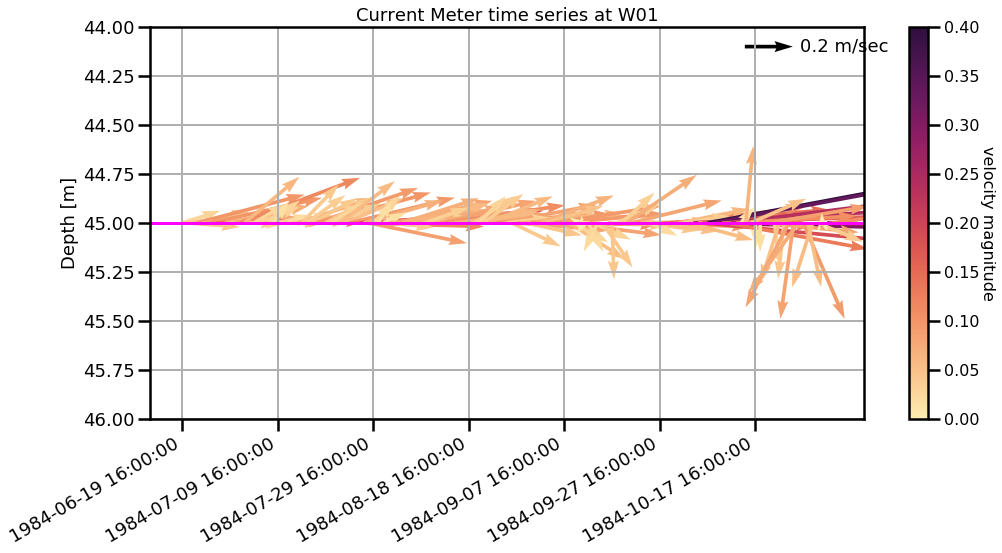

In [56]:
step = 1

# time_axis_quiver = np.arange(0,vel_east_30.shape[0],step)

time_axis_quiver_45 = np.arange(0, east_45.shape[0], step)

date1 = '1984-06-19-16:00:00'
date2 = '1984-11-02-08:20:00'
mydates = pd.date_range(date1, date2, freq="1440min")


fig, ax = plt.subplots(1, 1, figsize=(16,8))

# ax.quiver(time_axis_quiver, 30, vel_east_30[::step], vel_north_30[::step], Speed_30[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
# ax.axhline(y=30, color='magenta', label = '30 m')

Q = ax.quiver(time_axis_quiver_45, 45, east_45[::step], north_45[::step], Speed_45[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.3, cmap = cm)# , minshaft = 3)
ax.axhline(y=45, color='magenta', label = '45 m')


ax.set_ylabel('Depth [m]', fontsize =18)
plt.xticks(time_axis_quiver_45[::20], mydates[::20])
ax.format_xdata = DateFormatter('%Y-%m-%d-%h-%m')
fig.autofmt_xdate()
ax.set_ylim(44, 46)
ax.invert_yaxis()
ax.set_title('Current Meter time series at W01', fontsize = 18)
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 
ax.quiverkey(Q, 0.9, 0.95, 0.2, r'0.2 m/sec', labelpos='E', fontproperties={'size': 18})

cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=16) 
cbar.set_label('velocity magnitude', rotation=270, fontsize = 16, labelpad =16)
ax.tick_params(axis='both',labelsize =18)
# plt.savefig(path_to_save+'W01_daily.png')

In [57]:
np.mean(Speed_45)

0.3566800584223126

In [53]:
W01_series

1984-06-19 16:00:00    0.067718
1984-06-19 16:20:00    0.115500
1984-06-19 16:40:00    0.144541
1984-06-19 17:00:00    0.171624
1984-06-19 17:20:00    0.185474
1984-06-19 17:40:00    0.198406
1984-06-19 18:00:00    0.205249
1984-06-19 18:20:00    0.207108
1984-06-19 18:40:00    0.194639
1984-06-19 19:00:00    0.184149
1984-06-19 19:20:00    0.188447
1984-06-19 19:40:00    0.189224
1984-06-19 20:00:00    0.190544
1984-06-19 20:20:00    0.185523
1984-06-19 20:40:00    0.169220
1984-06-19 21:00:00    0.153492
1984-06-19 21:20:00    0.151792
1984-06-19 21:40:00    0.175238
1984-06-19 22:00:00    0.172022
1984-06-19 22:20:00    0.157241
1984-06-19 22:40:00    0.163939
1984-06-19 23:00:00    0.112278
1984-06-19 23:20:00    0.041582
1984-06-19 23:40:00    0.054025
1984-06-20 00:00:00    0.119108
1984-06-20 00:20:00    0.125127
1984-06-20 00:40:00    0.070198
1984-06-20 01:00:00    0.040020
1984-06-20 01:20:00    0.028604
1984-06-20 01:40:00    0.000995
                         ...   
1984-11-

In [54]:
daily = W01_series.resample('1440T').sum()

In [56]:
daily.shape

(137,)

In [64]:
vel_45_daily_east = daily.values

In [66]:
east_45 = np.divide(vel_45_daily_east[:],24)

array([  1.57457310e-01,   2.18605257e-01,   2.41477374e-01,
         4.49323929e-01,   3.44645015e-01,   3.82439235e-01,
         4.61181734e-01,   5.91183369e-01,   5.98795457e-01,
         3.47698396e-01,   2.03359455e-01,   3.84232727e-01,
         5.01408171e-01,   2.28557834e-01,   1.44137111e-01,
         1.33569926e-01,   1.72105806e-01,   2.47028086e-01,
         1.31513255e-01,   6.48783173e-02,   1.38006316e-01,
         2.07032470e-01,   1.11207430e-01,   2.40965430e-01,
         3.19919790e-01,   1.53737811e-01,   1.60447659e-01,
         1.90886308e-01,   4.24699070e-01,   4.57777576e-01,
         1.90762794e-01,   1.38556991e-01,   1.89639739e-01,
         2.28666181e-01,   2.45959384e-01,   4.39147167e-01,
         5.40616734e-01,   7.66817046e-01,   3.29185891e-01,
         4.10006899e-01,   1.11855813e-01,   5.98975728e-02,
         9.82197697e-02,   1.93556193e-01,   3.11799662e-01,
         3.95914381e-01,   3.21090828e-01,   3.30383910e-01,
         2.90979490e-01,

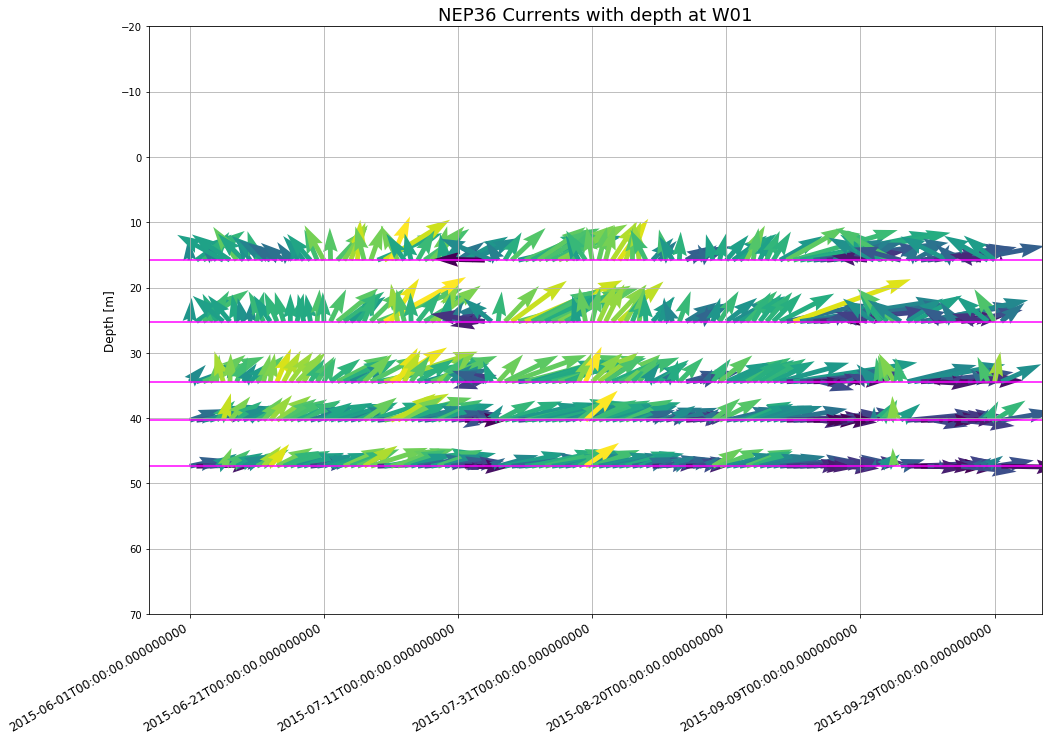

In [8]:
from IPython.display import Image


Image("/home/ssahu/saurav/3D_images_for_video_spice/W01_Model.png")

In [173]:
JF3_data_30m = pd.read_table('/data/ssahu/IOS_data/curr_meter/JF3_19930508_19931021_0030m.csv',delim_whitespace=1,header = None, skiprows=95)

JF3_data_30m.columns = ['Salinity', 'Temperature', 'Pressure', 'Direction', 'Speed']

JF3_data_30m.tail(10)

Salinity  Temperature  Pressure  Direction  Speed
7957    30.231        9.529    20.524    165.037  0.124
7958    30.202        9.460    20.375    177.871  0.074
7959    30.704       10.401    20.375    207.443  0.038
7960    30.756        9.781    20.375    229.293  0.041
7961    30.776        9.758    20.375    244.957  0.055
7962    30.922        9.942    20.375    267.037  0.075
7963    29.673        9.415    20.598    292.374  0.080
7964    30.005        9.643    20.822    333.224  0.057
7965    30.824        9.346    20.971     20.258  0.038
7966    30.627        9.575    21.120     22.840  0.033

In [175]:
JF3_data_75m = pd.read_table('/data/ssahu/IOS_data/curr_meter/JF3_19930508_19931021_0075m.csv',delim_whitespace=1,header = None, skiprows=96)

JF3_data_75m.columns = ['Salinity', 'Temperature', 'Direction', 'Speed']

JF3_data_75m.tail(10)

Salinity  Temperature  Direction  Speed
7957    33.602        7.991     68.149  0.121
7958    33.363        8.242     66.000  0.114
7959    33.573        8.022     71.328  0.112
7960    33.542        8.054     87.514  0.098
7961    33.587        8.007    127.500  0.082
7962    33.602        7.991    176.700  0.082
7963    33.602        7.991    206.538  0.086
7964    33.602        7.991    224.826  0.088
7965    33.602        7.991    247.725  0.102
7966    33.602        7.991    268.189  0.116

In [180]:
JF3_data_200m = pd.read_table('/data/ssahu/IOS_data/curr_meter/JF3_19930508_19931021_0200m.csv',delim_whitespace=1,header = None, skiprows=93)

JF3_data_200m.columns = ['Salinity', 'Temperature', 'Temperature (High res)','Direction', 'Speed']

JF3_data_200m.tail(10)

Salinity  Temperature  Temperature (High res)  Direction    Speed
7957    33.730        6.911                   6.935   -99999.0 -99999.0
7958    33.777        6.911                   6.935   -99999.0 -99999.0
7959    33.754        6.934                   6.959   -99999.0 -99999.0
7960    33.747        6.956                   6.966   -99999.0 -99999.0
7961    33.747        6.956                   6.966   -99999.0 -99999.0
7962    33.747        6.956                   6.966   -99999.0 -99999.0
7963    33.754        6.934                   6.959   -99999.0 -99999.0
7964    33.761        6.934                   6.951   -99999.0 -99999.0
7965    33.754        6.934                   6.959   -99999.0 -99999.0
7966    33.769        6.934                   6.943   -99999.0 -99999.0

In [181]:
Speed_30 = np.array(JF3_data_30m['Speed'], dtype = np.float)[:]
Direct_30 = np.array(JF3_data_30m['Direction'], dtype = np.float)[:]

vel_east_30 = np.empty_like(Speed_30)
vel_north_30 = np.empty_like(Speed_30)

vel_east_30[:] = Speed_30[:]*np.cos(np.radians(Direct_30[:]))
vel_north_30[:] = Speed_30[:]*np.sin(np.radians(Direct_30[:]))


Speed_75 = np.array(JF3_data_75m['Speed'], dtype = np.float)[:]
Direct_75 = np.array(JF3_data_75m['Direction'], dtype = np.float)[:]

vel_east_75 = np.empty_like(Speed_75)
vel_north_75 = np.empty_like(Speed_75)

vel_east_75[:] = Speed_75[:]*np.cos(np.radians(Direct_75[:]))
vel_north_75[:] = Speed_75[:]*np.sin(np.radians(Direct_75[:]))


Speed_200 = np.array(JF3_data_200m['Speed'], dtype = np.float)[:]
Direct_200 = np.array(JF3_data_200m['Direction'], dtype = np.float)[:]

vel_east_200 = np.empty_like(Speed_200)
vel_north_200 = np.empty_like(Speed_200)

vel_east_200[:] = Speed_200[:]*np.sin(np.radians(Direct_200[:]))

In [182]:
date1 = '1993-05-08-23:00:00'
date2 = '1993-10-21-22:00:00'


mydates = np.array(pd.date_range(date1, date2, freq="30min"))

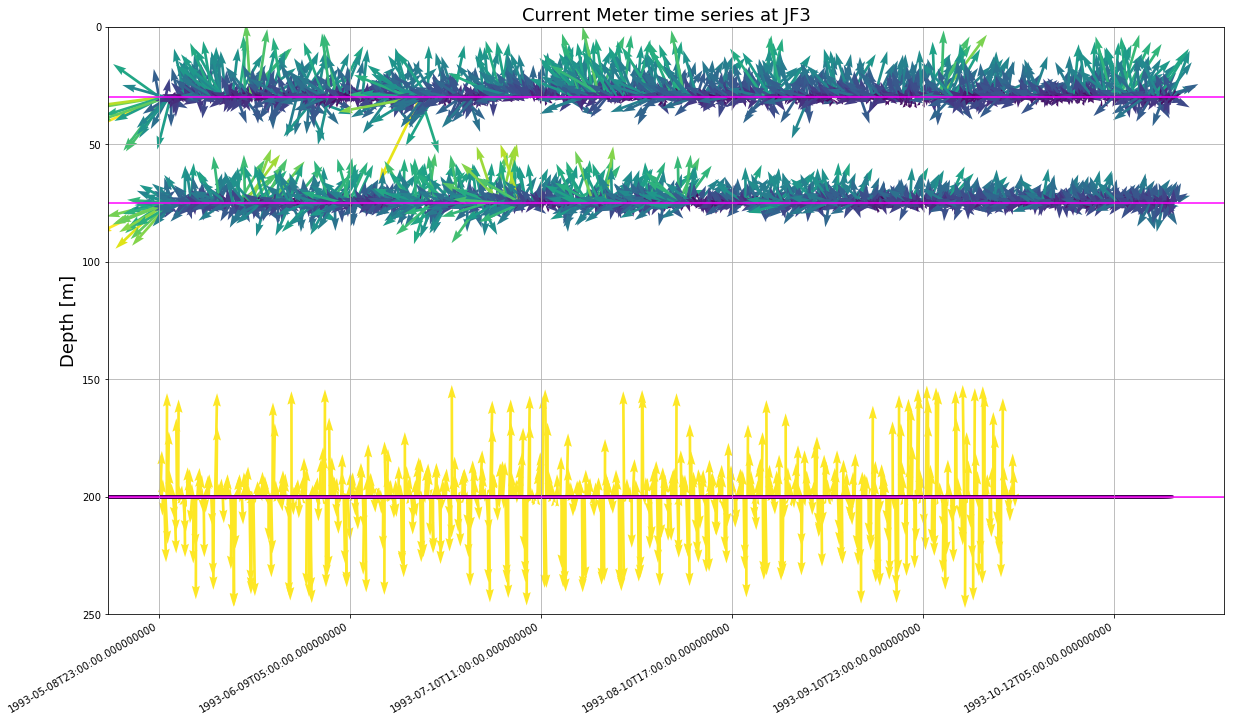

In [202]:
step = 5

time_axis_quiver = np.arange(0,vel_east_30.shape[0],step)

my_dates = mydates[::step]


fig, ax = plt.subplots(1, 1, figsize=(20,12))

ax.quiver(time_axis_quiver, 30, vel_east_30[::step], vel_north_30[::step], Speed_30[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
ax.axhline(y=30, color='magenta', label = '30 m')

ax.quiver(time_axis_quiver, 75, vel_east_75[::step], vel_north_75[::step], Speed_75[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
ax.axhline(y=75, color='magenta', label = '45 m')

ax.quiver(time_axis_quiver, 200, vel_east_200[::step], vel_north_200[::step], Speed_200[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=2)# , minshaft = 3)
ax.axhline(y=200, color='magenta', label = '200 m')


ax.set_ylabel('Depth [m]', fontsize =18)
plt.xticks(time_axis_quiver[::300], my_dates[::300])
ax.format_xdata = DateFormatter('%Y-%m-%d-%h-%m')
fig.autofmt_xdate()
ax.set_ylim(0, 250)
ax.invert_yaxis()
ax.set_title('Current Meter time series at JF3', fontsize = 18)
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 

In [204]:
JF1_data_30m = pd.read_table('/data/ssahu/IOS_data/curr_meter/JF1_19930508_19930515_0030m.csv',delim_whitespace=1,header = None, skiprows=92)

JF1_data_30m.columns = ['Salinity', 'Temperature', 'Pressure', 'Direction', 'Speed']

JF1_data_30m.tail(10)

Salinity  Temperature  Pressure  Direction  Speed
326    32.215       10.092    31.859    258.741  0.094
327    32.128       10.092    31.859    261.092  0.092
328    32.147        9.679    31.859    254.140  0.076
329    32.343        9.656    32.005    243.247  0.065
330    31.979        9.770    32.005    236.155  0.058
331    32.195        9.724    32.005    251.842  0.053
332    31.646        9.404    31.712    279.000  0.056
333    31.646        9.404    31.712    274.133  0.059
334    31.755        9.381    31.420    257.687  0.070
335    31.711        9.381    31.566    255.026  0.078

In [207]:
JF1_data_75m = pd.read_table('/data/ssahu/IOS_data/curr_meter/JF1_19930508_19930515_0075m.csv',delim_whitespace=1,header = None, skiprows=92)

JF1_data_75m.columns = ['Salinity', 'Temperature', 'Pressure', 'Direction', 'Speed']

JF1_data_75m.tail(10)

Salinity  Temperature  Pressure  Direction  Speed
326    33.235        9.239    75.915    273.806  0.171
327    33.256        9.216    75.915    282.510  0.181
328    33.256        9.216    75.915    291.633  0.186
329    33.193        9.331    75.915    298.941  0.185
330    33.193        9.331    75.915    308.190  0.184
331    33.172        9.354    75.915    324.649  0.190
332    33.034        9.216    75.915    335.958  0.192
333    33.099        9.194    75.915    339.899  0.179
334    33.013        9.239    75.915    336.317  0.161
335    32.970        9.285    75.915    326.389  0.158

In [210]:
JF1_data_150m = pd.read_table('/data/ssahu/IOS_data/curr_meter/JF1_19930508_19930515_0150m.csv',delim_whitespace=1,header = None, skiprows=94)

JF1_data_150m.columns = ['Salinity', 'Temperature', 'Pressure', 'Direction', 'Speed']

JF1_data_150m.tail(10)

Salinity  Temperature  Pressure  Direction  Speed
326    35.388        7.101     7.093     30.623  0.242
327    35.388        7.055     7.047     35.004  0.252
328    35.397        6.988     6.992     39.479  0.251
329    35.445        6.943     6.946     46.472  0.248
330    35.381        7.010     7.008     49.518  0.237
331    35.372        7.123     7.109     49.964  0.221
332    35.274        7.394     7.389     54.483  0.212
333    35.241        7.485     7.467     61.163  0.192
334    35.208        7.598     7.592     66.825  0.160
335    35.201        7.598     7.599     59.990  0.112

In [212]:
JF1_data_250m = pd.read_table('/data/ssahu/IOS_data/curr_meter/JF1_19930508_19930515_0250m.csv',delim_whitespace=1,header = None, skiprows=92)

JF1_data_250m.columns = ['Salinity', 'Temperature', 'Pressure', 'Direction', 'Speed']

JF1_data_250m.tail(10)

Salinity  Temperature  Pressure  Direction  Speed
326    34.271        6.201     6.222     60.471  0.113
327    34.293        6.133     6.152     59.106  0.108
328    34.317        6.111     6.128     44.609  0.061
329    34.307        6.021     6.043    330.631  0.037
330    34.315        6.066     6.082    294.801  0.065
331    34.317        6.111     6.128    286.295  0.095
332    34.295        6.179     6.198    284.422  0.128
333    34.281        6.292     6.307    287.015  0.130
334    34.244        6.427     6.439    302.040  0.092
335    34.269        6.472     6.509    334.500  0.075

In [213]:
Speed_30 = np.array(JF1_data_30m['Speed'], dtype = np.float)[:]
Direct_30 = np.array(JF1_data_30m['Direction'], dtype = np.float)[:]

vel_east_30 = np.empty_like(Speed_30)
vel_north_30 = np.empty_like(Speed_30)

vel_east_30[:] = Speed_30[:]*np.cos(np.radians(Direct_30[:]))
vel_north_30[:] = Speed_30[:]*np.sin(np.radians(Direct_30[:]))


Speed_75 = np.array(JF1_data_75m['Speed'], dtype = np.float)[:]
Direct_75 = np.array(JF1_data_75m['Direction'], dtype = np.float)[:]

vel_east_75 = np.empty_like(Speed_75)
vel_north_75 = np.empty_like(Speed_75)

vel_east_75[:] = Speed_75[:]*np.cos(np.radians(Direct_75[:]))
vel_north_75[:] = Speed_75[:]*np.sin(np.radians(Direct_75[:]))


Speed_150 = np.array(JF1_data_150m['Speed'], dtype = np.float)[:]
Direct_150 = np.array(JF1_data_150m['Direction'], dtype = np.float)[:]

vel_east_150 = np.empty_like(Speed_150)
vel_north_150 = np.empty_like(Speed_150)

vel_east_150[:] = Speed_150[:]*np.sin(np.radians(Direct_150[:]))


Speed_250 = np.array(JF1_data_250m['Speed'], dtype = np.float)[:]
Direct_250 = np.array(JF1_data_250m['Direction'], dtype = np.float)[:]

vel_east_250 = np.empty_like(Speed_250)
vel_north_250 = np.empty_like(Speed_250)

vel_east_250[:] = Speed_250[:]*np.sin(np.radians(Direct_250[:]))

In [216]:
date1 = '1993-05-08-20:00:00'
date2 = '1993-05-15-19:30:00'


mydates = np.array(pd.date_range(date1, date2, freq="30min"))




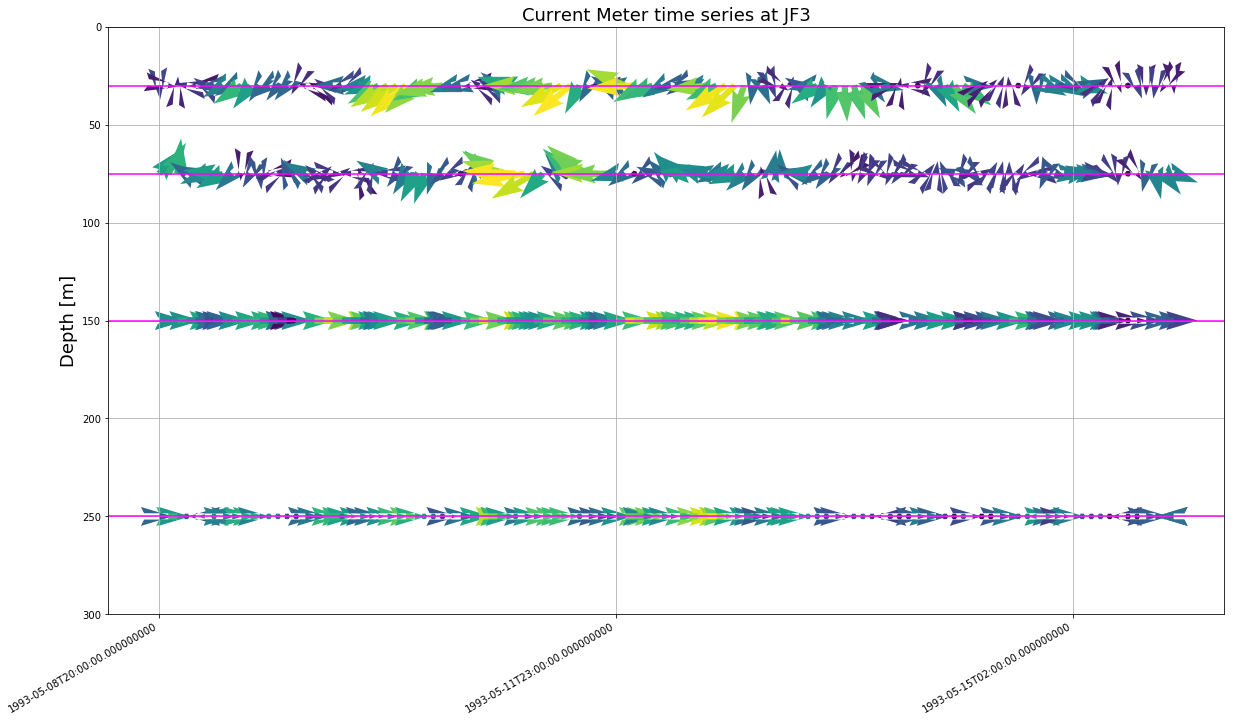

In [220]:
step = 3

time_axis_quiver = np.arange(0,vel_east_30.shape[0],step)

my_dates = mydates[::step]


fig, ax = plt.subplots(1, 1, figsize=(20,12))

ax.quiver(time_axis_quiver, 30, vel_east_30[::step], vel_north_30[::step], Speed_30[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
ax.axhline(y=30, color='magenta', label = '30 m')

ax.quiver(time_axis_quiver, 75, vel_east_75[::step], vel_north_75[::step], Speed_75[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
ax.axhline(y=75, color='magenta', label = '45 m')

ax.quiver(time_axis_quiver, 150, vel_east_150[::step], vel_north_150[::step], Speed_150[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
ax.axhline(y=150, color='magenta', label = '200 m')

ax.quiver(time_axis_quiver, 250, vel_east_250[::step], vel_north_250[::step], Speed_250[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
ax.axhline(y=250, color='magenta', label = '200 m')


ax.set_ylabel('Depth [m]', fontsize =18)
plt.xticks(time_axis_quiver[::50], my_dates[::50])
ax.format_xdata = DateFormatter('%Y-%m-%d-%h-%m')
fig.autofmt_xdate()
ax.set_ylim(0, 300)
ax.invert_yaxis()
ax.set_title('Current Meter time series at JF3', fontsize = 18)
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 

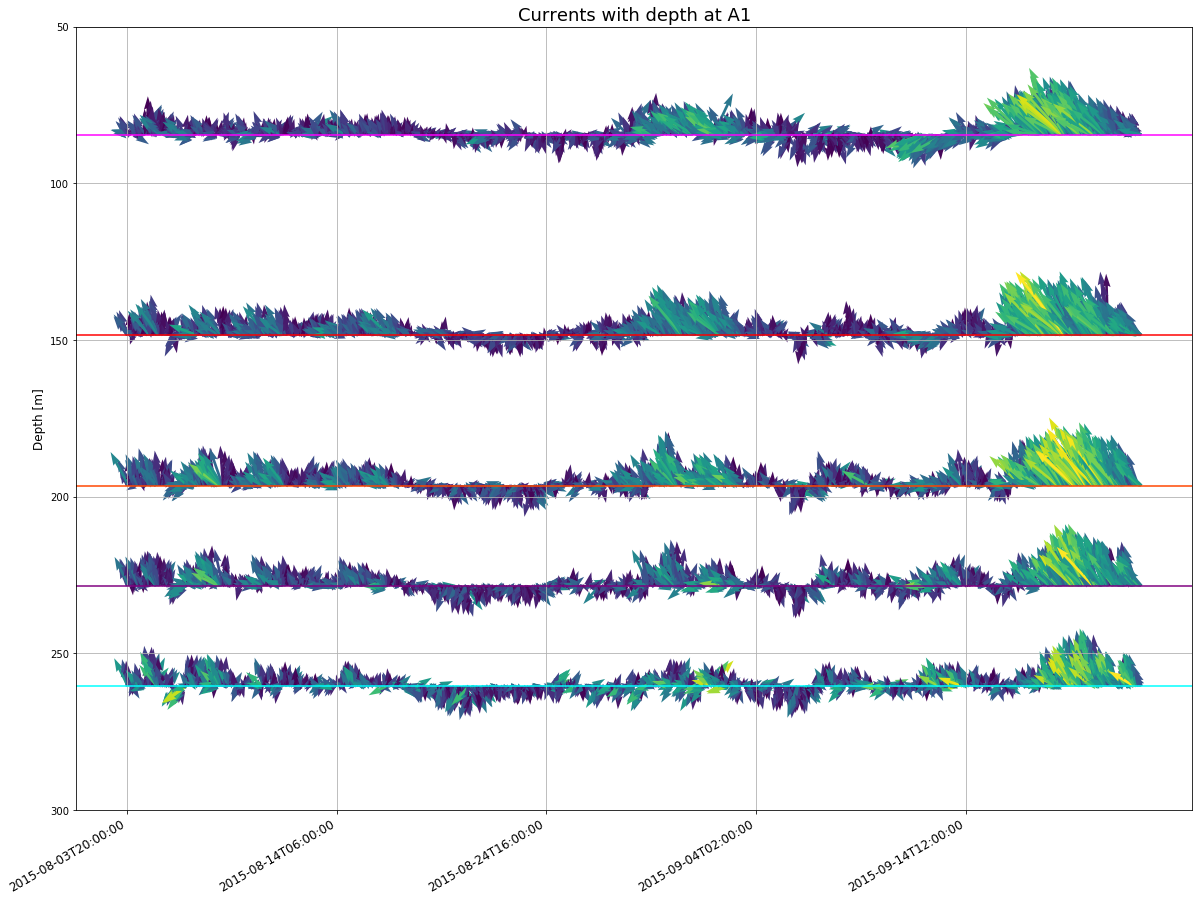

In [6]:
from IPython.display import Image


Image("/home/ssahu/saurav/3D_images_for_video_spice/A1_ADCP.png")

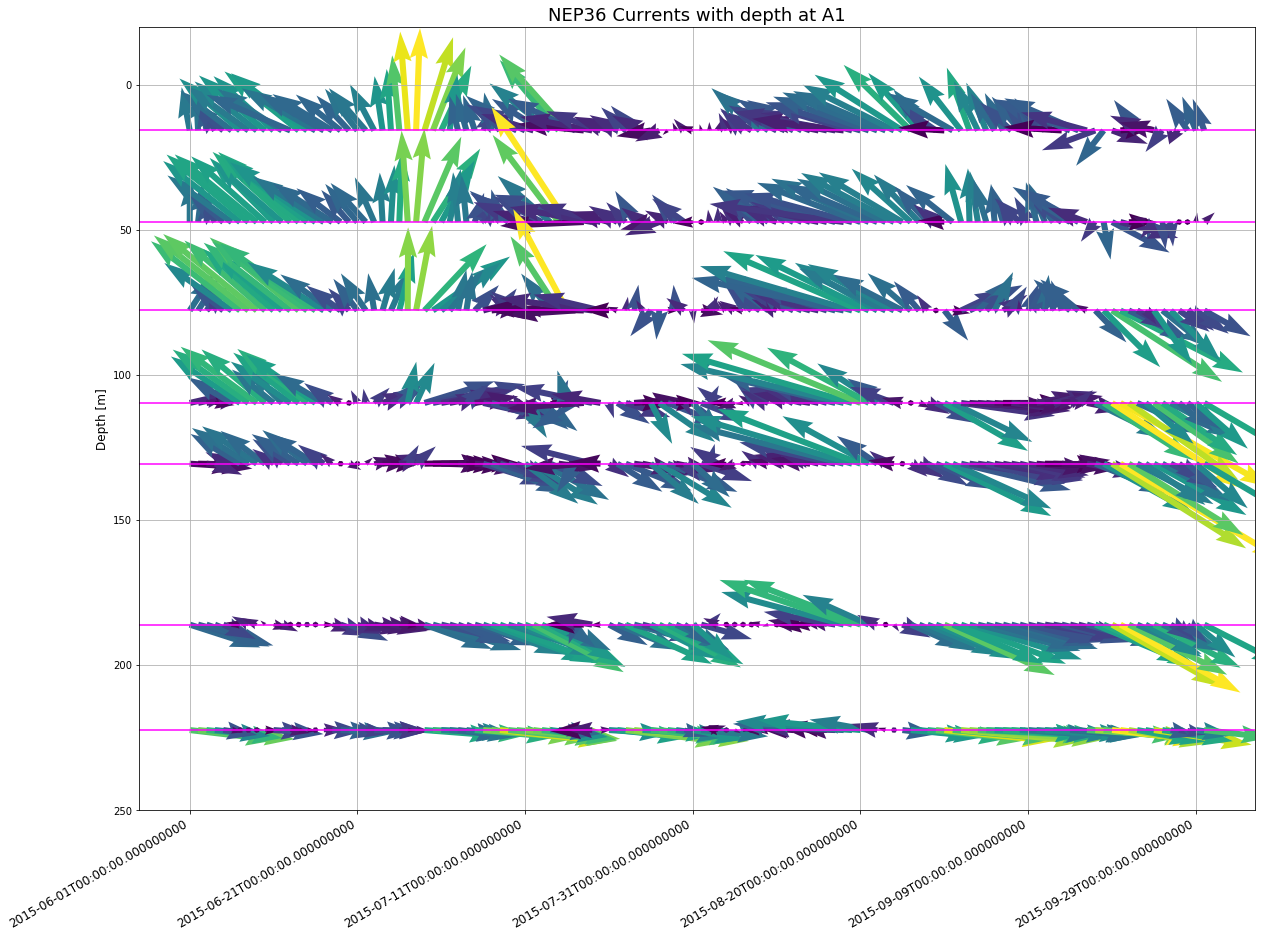

In [7]:
from IPython.display import Image


Image("/home/ssahu/saurav/3D_images_for_video_spice/A1_Model_currents.png")

In [ ]:
vel_east_84  = np.array(A1_data['vel_east_84.44'], dtype = np.float)[:4320]
mag_84       = np.sqrt(vel_east_84**2,vel_north_84**2)

vel_north_148 = np.array(A1_data['vel_north_148.44'], dtype = np.float)[:4320]
vel_east_148  = np.array(A1_data['vel_east_148.44'], dtype = np.float)[:4320]
mag_148       = np.sqrt(vel_east_148**2,vel_north_148**2)

vel_north_196 = np.array(A1_data['vel_north_196.44'], dtype = np.float)[:4320]
vel_east_196  = np.array(A1_data['vel_east_196.44'], dtype = np.float)[:4320]
mag_196      = np.sqrt(vel_east_196**2,vel_north_196**2)

In [ ]:
str_stuff = np.array(['Record_Number', 'Date', 'Time', 'Pitch', 'Roll', 'Heading', 'Pressure', 'Temperature'], dtype = 'str')

bin_depths = np.array([84.44, 100.44, 116.44, 132.44, 148.44, 164.44, 180.44, 196.44, 212.44, 228.44, 244.44, 260.44, 276.44\
              , 292.44, 308.44, 324.44, 340.44, 356.44, 372.44, 388.44, 404.44, 420.44, 436.44, 452.44, 468.44], dtype = 'str')

variables = np.array(['vel_north', 'vel_east', 'vel_vert', 'back_scatter_mean'], dtype = 'str')

column_data = []

for j in bin_depths:
    for i in variables:
        column_data = np.append(arr=column_data, values=i+'_'+j)
    

columns_A1 = np.concatenate((str_stuff, column_data), axis = 0)

A1_data.columns = columns_A1